In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

import neuro_morpho_toolbox as nmt
ns = nmt.neuron_set('/home/penglab/Documents/Janelia_1000')
_ = ns.ReduceDimUMAP(feature_set="projection_features", n_neighbors=2)

/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 1.04
Loading CCF brain structure data...
Loading time: 0.00
Loading...
100 loaded: 2.8s
Invalid number of soma found: 0
QC failed: AA0114.swc
Invalid number of soma found: 0
QC failed: AA0115.swc
200 loaded: 2.5s
300 loaded: 2.7s
400 loaded: 2.7s
Invalid number of soma found: 0
QC failed: AA0472.swc
500 loaded: 2.8s
Invalid number of soma found: 0
QC failed: AA0576.swc
Invalid number of soma found: 0
QC failed: AA0585.swc
Invalid number of soma found: 0
QC failed: AA0589.swc
600 loaded: 2.7s
Invalid number of soma found: 0
QC failed: AA0639.swc
Invalid number of soma found: 0
QC failed: AA0670.swc
Invalid number of soma found: 0
QC failed: AA0672.swc
700 loaded: 2.8s
Invalid number of soma found: 0
QC failed: AA0754.swc
Invalid number of soma found: 0
QC failed: AA0763.swc
800 loaded: 3.2s
900 loaded: 1.9s
QC failed: AA0952.swc
QC failed: AA0964.swc
QC failed: AA0968.swc
QC

/home/penglab/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning:

Embedding a total of 220 separate connected components using meta-embedding (experimental)



## Analyzing projection feature

In [3]:
import pandas as pd
fre_M_dbscan = pd.read_excel('/home/penglab/FeaCal/dataSource/projFea/fre_M_dbscan.xlsx', index_col=0)
fre_M_hdbscan = pd.read_excel('/home/penglab/FeaCal/dataSource/projFea/fre_M_hdbscan.xlsx', index_col=0)
fre_M_snn = pd.read_excel('/home/penglab/FeaCal/dataSource/projFea/fre_M_snn.xlsx', index_col=0)
fre_M_kmeans = pd.read_excel('/home/penglab/FeaCal/dataSource/projFea/fre_M_kmeans.xlsx', index_col=0)
fre_M_hier = pd.read_excel('/home/penglab/FeaCal/dataSource/projFea/fre_M_hier.xlsx', index_col=0)


Set color

In [99]:
colorlist=["#7FC97F","#BEAED4","#FDC086","#FFFF99","#386CB0","#F0027F","#BF5B17","#666666","#1B9E77","#D95F02",
           "#7570B3","#E7298A","#66A61E","#E6AB02","#A6761D","#666666","#A6CEE3","#1F78B4","#B2DF8A","#33A02C",
           "#FB9A99","#E31A1C","#FDBF6F","#FF7F00","#CAB2D6","#6A3D9A","#FFFF99","#B15928","#FBB4AE","#B3CDE3",
           "#CCEBC5","#DECBE4","#FED9A6","#FFFFCC","#E5D8BD","#FDDAEC","#F2F2F2","#B3E2CD","#FDCDAC","#CBD5E8",
           "#F4CAE4","#E6F5C9","#FFF2AE","#F1E2CC","#CCCCCC","#E41A1C","#377EB8","#4DAF4A","#984EA3","#FF7F00",
           "#FFFF33","#A65628","#F781BF","#999999","#66C2A5","#FC8D62","#8DA0CB","#E78AC3","#A6D854","#FFD92F",
           "#E5C494","#B3B3B3","#8DD3C7","#FFFFB3","#BEBADA","#FB8072","#80B1D3","#FDB462","#B3DE69","#FCCDE5",
           "#D9D9D9","#BC80BD","#CCEBC5"]
lut = dict(zip(ns.metadata['CellType'].unique(), colorlist))
row_colors = ns.metadata['CellType'].map(lut)
row_colors[row_colors.isnull()]='white'

### Hier

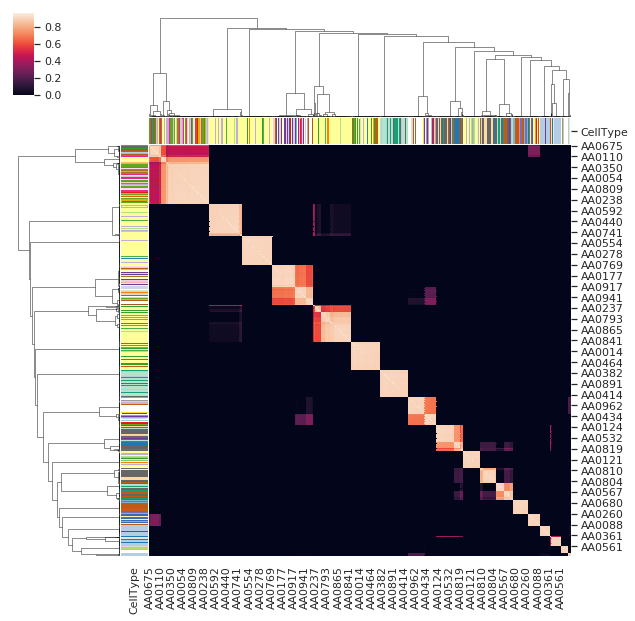

In [97]:
import seaborn as sns; sns.set()
fre_M_hier = pd.read_excel('/home/penglab/FeaCal/dataSource/projFea/fre_M_hier.xlsx', index_col=0)
#arr_hier = fre_M_hier.values
#sns.heatmap(arr_hier/5000)

ax=sns.clustermap(fre_M_hier/5000,row_colors=row_colors ,col_colors = row_colors )

### KMEANS

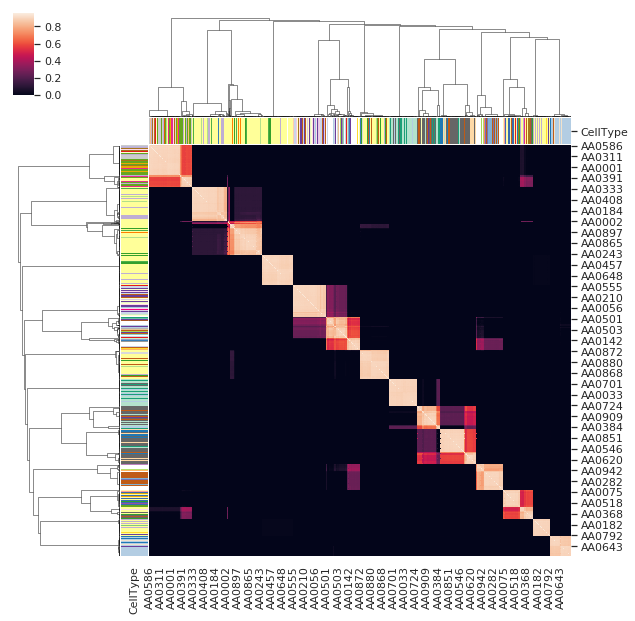

In [100]:
fre_M_kmeans = pd.read_excel('/home/penglab/FeaCal/dataSource/projFea/fre_M_kmeans.xlsx', index_col=0)
#arr_kmeans = fre_M_kmeans.values

#sns.heatmap(arr_kmeans/5000)

ax=sns.clustermap(fre_M_kmeans/5000,row_colors=row_colors ,col_colors = row_colors )

### SNN

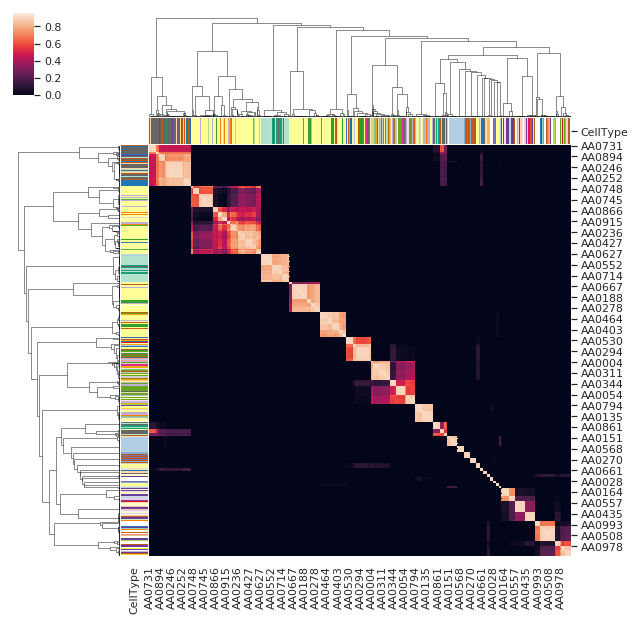

In [102]:
fre_M_snn = pd.read_excel('/home/penglab/FeaCal/dataSource/projFea/fre_M_snn.xlsx', index_col=0)
#arr_snn = fre_M_snn.values
#import seaborn as sns; sns.set()
#sns.heatmap(arr_snn/5000)

ax=sns.clustermap(fre_M_snn/5000,row_colors=row_colors ,col_colors = row_colors)

### DBSCAN

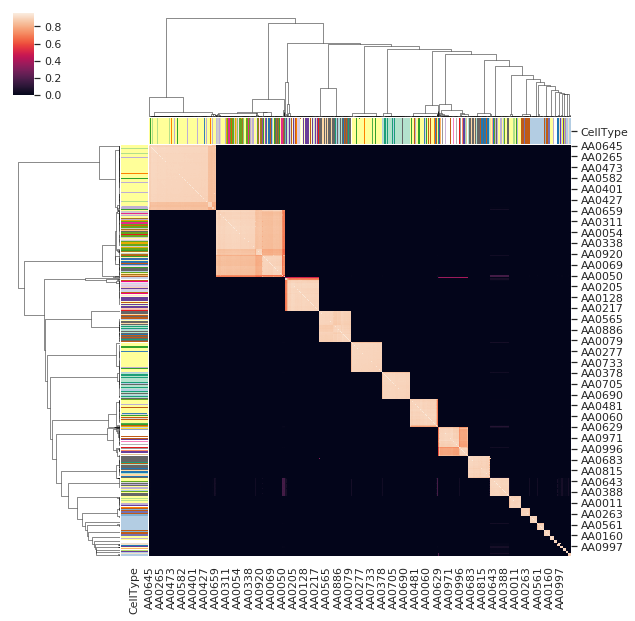

In [106]:
fre_M_dbscan= pd.read_excel('/home/penglab/FeaCal/dataSource/projFea/fre_M_dbscan.xlsx', index_col=0)

ax=sns.clustermap(fre_M_dbscan/5000,row_colors=row_colors ,col_colors = row_colors)

### HDBSCAN

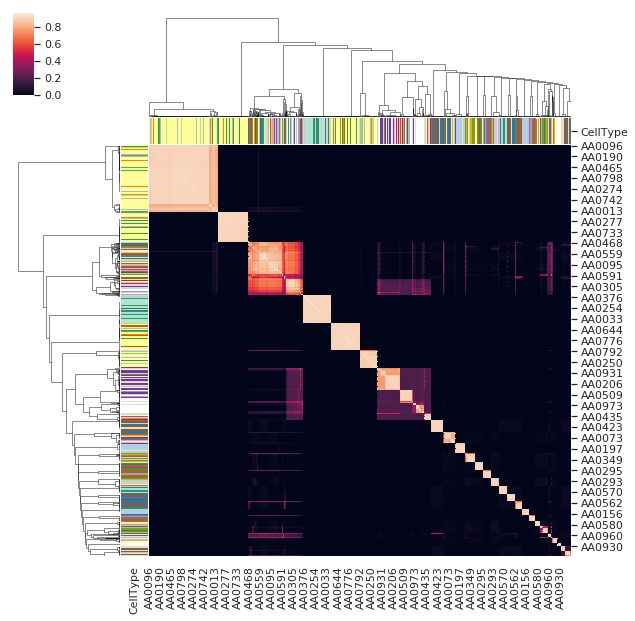

In [103]:
fre_M_hdbscan= pd.read_excel('/home/penglab/FeaCal/dataSource/projFea/fre_M_hdbscan.xlsx', index_col=0)

ax=sns.clustermap(fre_M_hdbscan/5000,row_colors=row_colors ,col_colors = row_colors)

In [90]:

row_colors

AA0001    #7FC97F
AA0002    #BEAED4
AA0003    #BEAED4
AA0004    #BEAED4
AA0005    #BEAED4
AA0006    #BEAED4
AA0007    #FDC086
AA0008    #FDC086
AA0009    #BEAED4
AA0010    #FFFF99
AA0011    #FFFF99
AA0012    #FFFF99
AA0013    #FFFF99
AA0014    #FFFF99
AA0015    #386CB0
AA0016    #386CB0
AA0017    #F0027F
AA0018    #BF5B17
AA0019    #386CB0
AA0020    #666666
AA0021    #1B9E77
AA0022    #BF5B17
AA0023    #D95F02
AA0024    #1B9E77
AA0025    #BF5B17
AA0026    #1B9E77
AA0027    #7570B3
AA0028    #7570B3
AA0029    #BF5B17
AA0030    #1B9E77
           ...   
AA0972       pink
AA0973       pink
AA0974       pink
AA0975       pink
AA0976       pink
AA0978       pink
AA0979       pink
AA0980       pink
AA0981       pink
AA0982       pink
AA0983       pink
AA0984       pink
AA0985       pink
AA0986       pink
AA0987    #6A3D9A
AA0988       pink
AA0989       pink
AA0990       pink
AA0991       pink
AA0992    #BF5B17
AA0993       pink
AA0994    #7FC97F
AA0995       pink
AA0996    #8DD3C7
AA0997    

In [80]:
type(row_colors)

pandas.core.series.Series

In [81]:
import seaborn as sns; sns.set(color_codes=True)
iris = sns.load_dataset("iris")
species = iris.pop("species")
lut = dict(zip(species.unique(), "rbg"))
row_colors = species.map(lut)

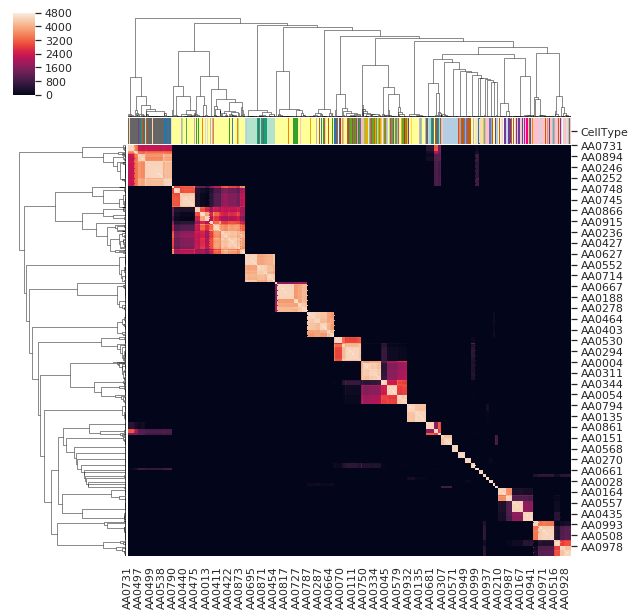

In [94]:

g = sns.clustermap(fre_M_snn, col_colors=pd.Series(row_colors))

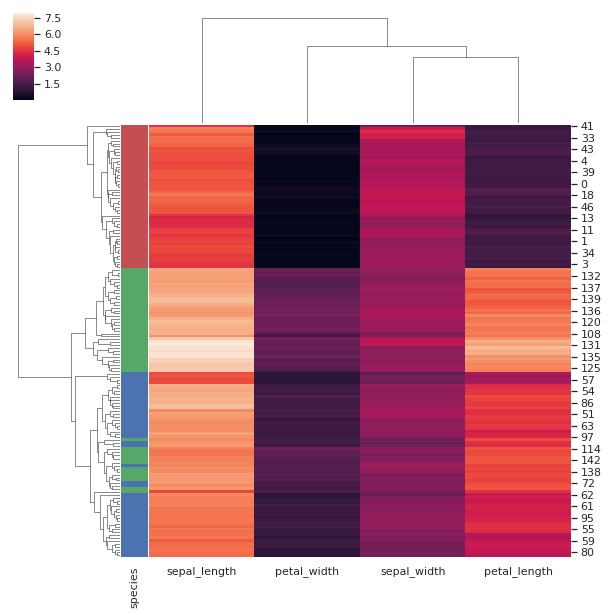

In [83]:

g = sns.clustermap(iris, row_colors=row_colors)

In [62]:
species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(200, 100))

sns.heatmap(arr_hier, cmap="YlGnBu",xticklabels=ns.UMAP.index.tolist(), yticklabels=ns.UMAP.index.tolist())

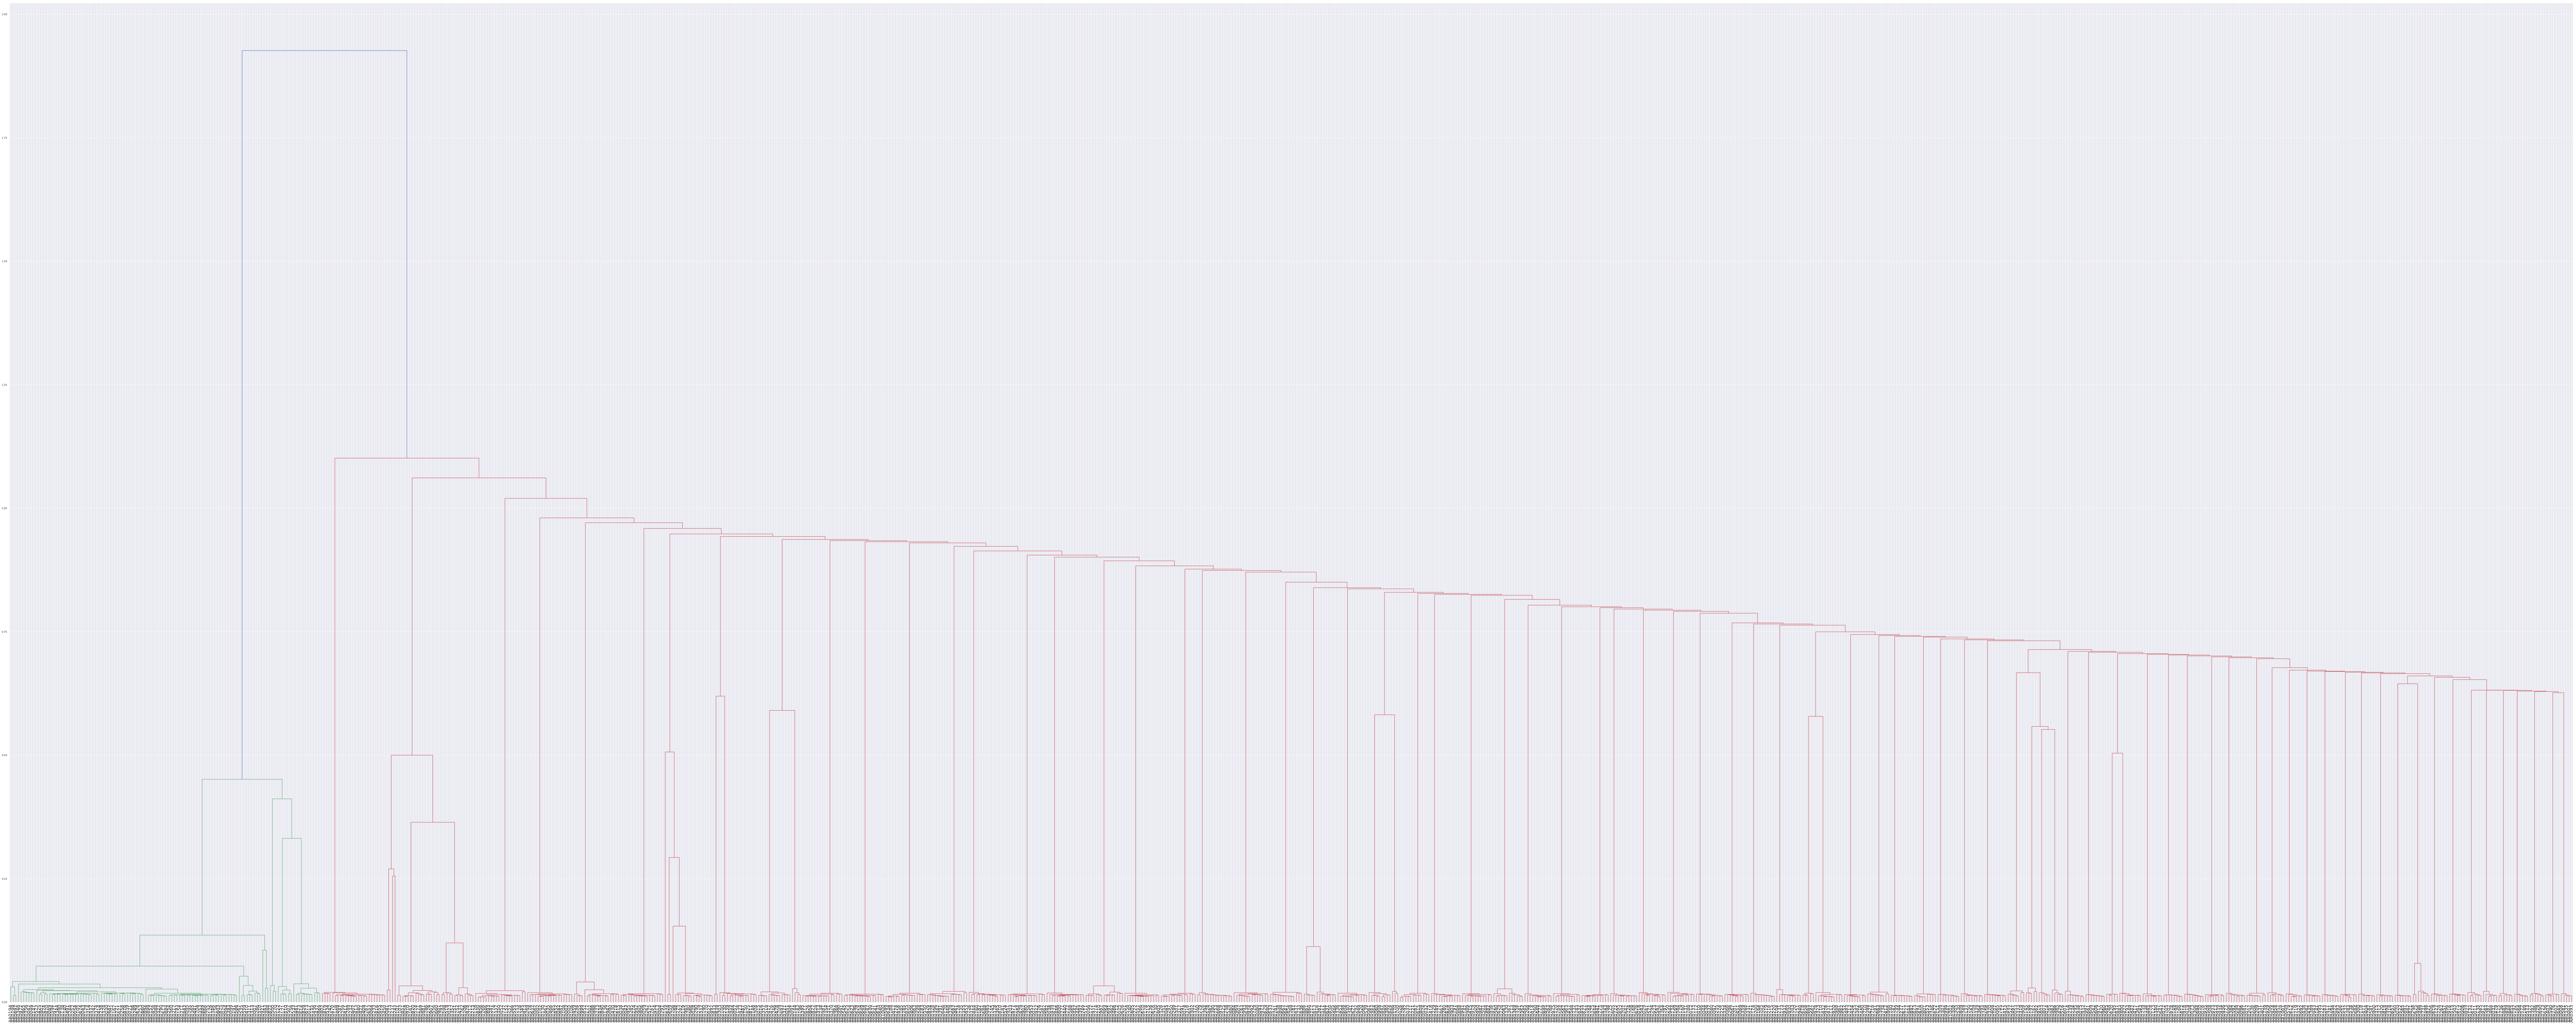

In [42]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster,inconsistent

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


import numpy as np
linkmethod = ['single', 'complete','average','weighted','centroid','median','ward']
paraDF = pd.DataFrame(columns =['method','CCC'],index = linkmethod)
paraDF.loc[:,'method'] = linkmethod

for iter_m in linkmethod:
    Z_sample = linkage(fre_M_hier/5000, iter_m)
    c, coph_dists = cophenet(Z_sample , pdist(fre_M_hier/5000))
    paraDF.loc[iter_m,'CCC'] = c
paraDF.sort_values(by='CCC', ascending=False, inplace=True)
Z_sample = linkage(fre_M_hier/5000, paraDF.iloc[0,0])
fig, ax = plt.subplots(1, 1, figsize=(200, 80))
d = dendrogram(Z_sample, labels=fre_M_hier.index, leaf_rotation=90, leaf_font_size=20,
                   orientation="top", color_threshold=None,
                   )

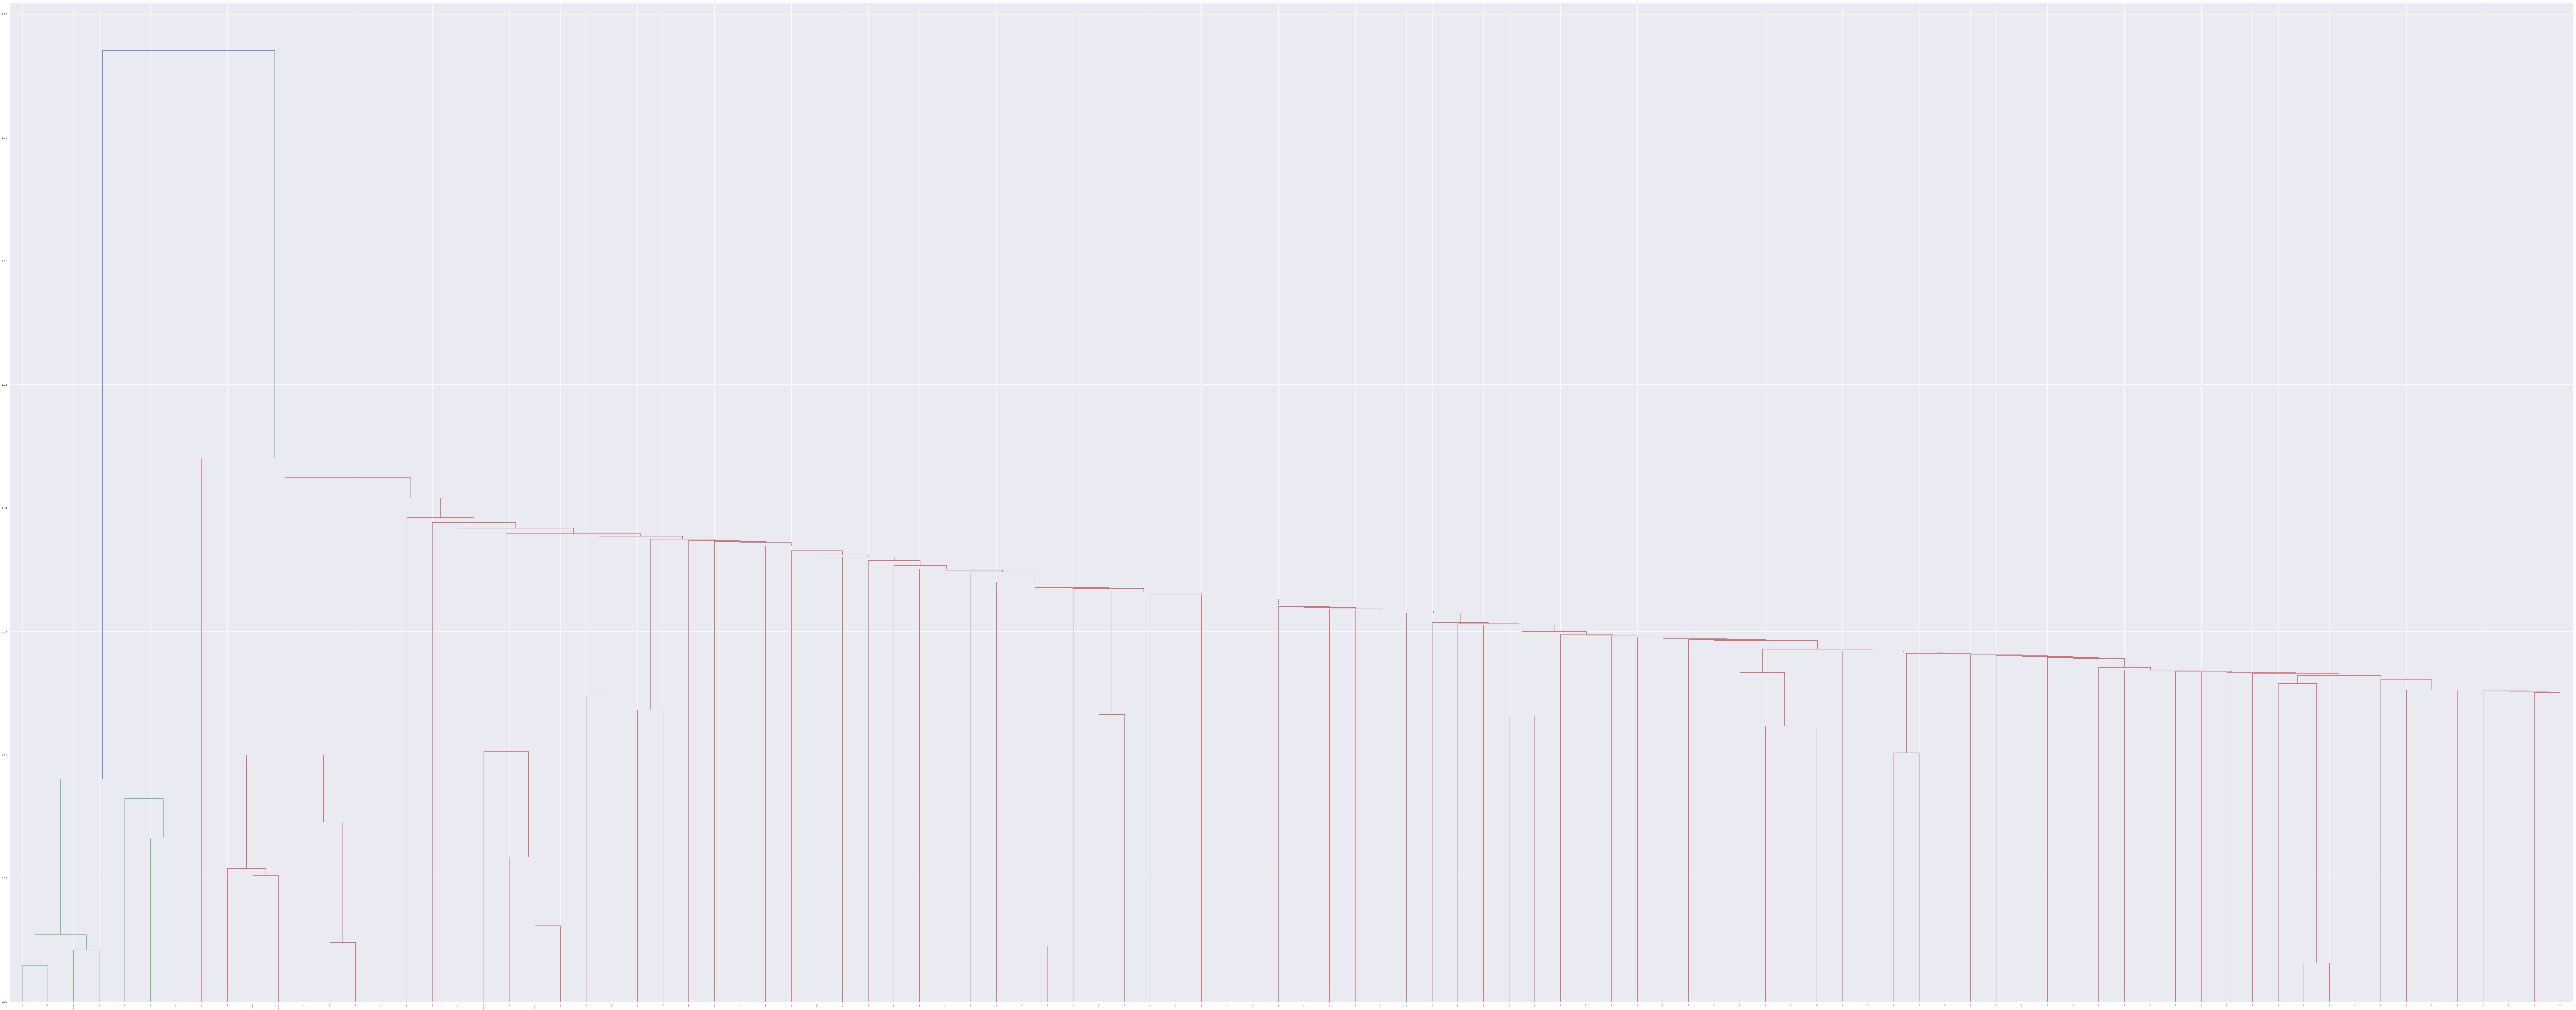

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(200, 80))
d = dendrogram(Z_sample, labels=fre_M_hier.index, leaf_rotation=90,
               truncate_mode='lastp',  # show only the last p merged clusters
               p=100,  # show only the last p merged clusters
               orientation="top", color_threshold=None,
                   )

In [39]:
d

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [20.0, 20.0, 52.5, 52.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [92.5, 92.5, 122.5, 122.5],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [395.0, 395.0, 405.0, 405.0],
  [425.0, 425.0, 435.0, 435.0],
  [585.0, 585.0, 595.0, 595.0],
  [695.0, 695.0, 705.0, 705.0],
  [685.0, 685.0, 700.0, 700.0],
  [675.0, 675.0, 692.5, 692.5],
  [735.0, 735.0, 745.0, 745.0],
  [895.0, 895.0, 905.0, 905.0],
  [885.0, 885.0, 900.0, 900.0],
  [985.0, 985.0, 995.0, 995.0],
  [975.0, 975.0, 990.0, 990.0],
  [965.0, 965.0, 982.5, 982.5],
  [955.0, 955.0, 973.75, 973.75],
  [945.0, 945.0, 964.375, 964.375],
  [935.0, 935.0, 954.6875, 954.6875],
  [925.0, 925.0, 9

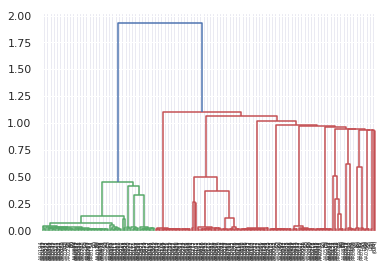

In [45]:
d = dendrogram(Z_sample, labels=fre_M_hier.index, leaf_rotation=90,
               truncate_mode='level',  # show only the last p merged clusters
               p=12,  # show only the last p merged clusters
               orientation="top", color_threshold=None,
                   )

In [33]:
typeR, typeC = np.unique(ns.metadata['CellType'], return_counts = True)

In [52]:
ns.metadata['CellType'].unique()

array(['SSp-m', 'MOp', 'SSp-ul', 'MOs', 'AV', 'BST', 'fiber tracts',
       'SUB', 'POST', 'AM', 'VISp', 'PCN', 'VAL', 'PO', 'CL', 'MD', 'PF',
       'CA1', 'ORBl', 'ACAd', 'IAD', 'AD', 'CM', 'PVi', 'DMH', 'unknown',
       'RE', 'PR', 'VMH', 'DG', 'SBPV', 'AHN', 'ProS', 'ZI', 'VPMpc',
       'VM', 'PVH', 'PRE', 'PeF', 'LHA', 'PH', 'PSTN', 'LD', 'CA3', 'VPM',
       'VPL', 'ORBvl', 'FRP', 'LP', 'PL', 'RT', 'FN', 'PAG', 'IRN', 'IC',
       'PARN', 'DR', 'GRN', 'PRNc', 'MRN', 'PGRNd', 'SPIV', 'MDRNd',
       'ENTm', 'SMT', 'VISli', 'VISl', 'PIL', 'POL', 'PoT', 'ACAv',
       'AUDd', 'PIR', 'BMA', 'MM', 'AUDp', 'SGN', 'SSp-bfd', 'V', 'SPVI',
       'MDRNv', 'LRN', 'IG', 'COAp', 'LSr', 'CENT', 'FL', 'COPY', 'PYR',
       'CUL', 'SIM', 'AN', 'PFL', 'FOTU', 'NOD', 'SUV', 'PRM', 'SSs',
       'MOB', 'ENTl'], dtype=object)

In [36]:
len(typeR)

100